# Players stats analysis 👨🏾‍💻

## 🔵1. Libraries importing

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import emoji
import warnings

warnings.filterwarnings("ignore")

## 🔵 2. Data loading

In [2]:
path = 'C:/Projects/Python/Data/players_stats.csv'
df = pd.read_csv(path)

## 🔵 3. Data Wrangling

In [3]:
pd.set_option('display.max_columns', None)
df.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [4]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

### 🔵 3.1 Data Cleaning

In [13]:
precleaned = (df[df.columns[:72].tolist()]
                .rename(columns = {'sofifa_id':'id','long_name':'name',
                                   'value_eur':'value','wage_eur':'wage'})
                .drop(['short_name', 'player_url','dob','club_team_id',
                      'club_jersey_number','club_loaned_from','club_joined',
                      'club_contract_valid_until','nation_team_id','nation_position',
                      'nation_jersey_number','work_rate','body_type',
                        'real_face','release_clause_eur','player_tags','player_traits'], axis=1))

In [15]:
precleaned.head(3)

,id,name,player_positions,overall,potential,value,wage,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,158023,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,1.0,RW,52,Argentina,Left,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24
1,188545,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,1.0,ST,37,Poland,Right,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19
2,20801,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,English Premier League,1.0,ST,38,Portugal,Right,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24


In [7]:
precleaned.shape

(19239, 55)

### 🔵 3.2 Handling missing values

In [24]:
nulls = precleaned.isna().sum()
nulls[nulls>0]

value              74
wage               61
club_name          61
league_name        61
league_level       61
club_position      61
pace             2132
shooting         2132
passing          2132
dribbling        2132
defending        2132
physic           2132
dtype: int64

In [20]:
players[players['value'].isnull()]['club_name'].value_counts()

Yokohama FC                    2
Club Nacional de Football      1
Club Atlético Lanús            1
Newell's Old Boys              1
FC Cartagena                   1
Gimnasia y Esgrima La Plata    1
Altay SK                       1
12 de Octubre FC               1
Guangzhou FC                   1
Newport County                 1
Hokkaido Consadole Sapporo     1
Sutton United                  1
Name: club_name, dtype: int64

In [32]:
players[players['wage'].isna()]['club_name'].value_counts()

Series([], Name: club_name, dtype: int64)

In [212]:
cols = ['pace','shooting','passing','dribbling','defending','physic']
values = []
for col in cols:
    row = players[players[col].isnull()]['club_position'].value_counts()
    for i in range(len(row.values)):
        values.append([row.index[i],row.values[i],col])
        
cols = ['position','values','item']  
null_data = pd.DataFrame(values, columns = cols)
pd.pivot_table(null_data,values='values', index=['position'],columns=['item'], aggfunc=np.sum)

item,defending,dribbling,pace,passing,physic,shooting
position,,,,,,
,8,8,8,8,8,8
GK,701,701,701,701,701,701
RES,484,484,484,484,484,484
SUB,939,939,939,939,939,939


In [33]:
players = players[['value','wage','league_level']].fillna(0, inplace = True)

## 🔵 4. EDA of features

### 🔵 4.1 Prices analysis

In [91]:
values.describe().round(0)

,id,value_eur
count,19239.0,19239.0
mean,231468.0,2839488.0
std,27040.0,7601091.0
min,41.0,0.0
25%,214414.0,475000.0
50%,236543.0,975000.0
75%,253532.0,2000000.0
max,264640.0,194000000.0


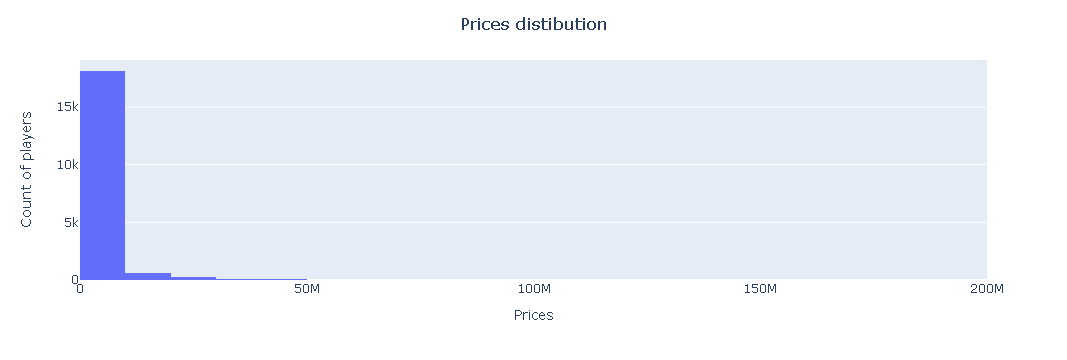

In [104]:
fig = px.histogram(values, x="value_eur", nbins = 20)
fig.update_layout(
    title = 'Prices distibution',
    title_x = 0.5,
    xaxis_title = "Prices",
    yaxis_title = "Count of players")
fig.show()

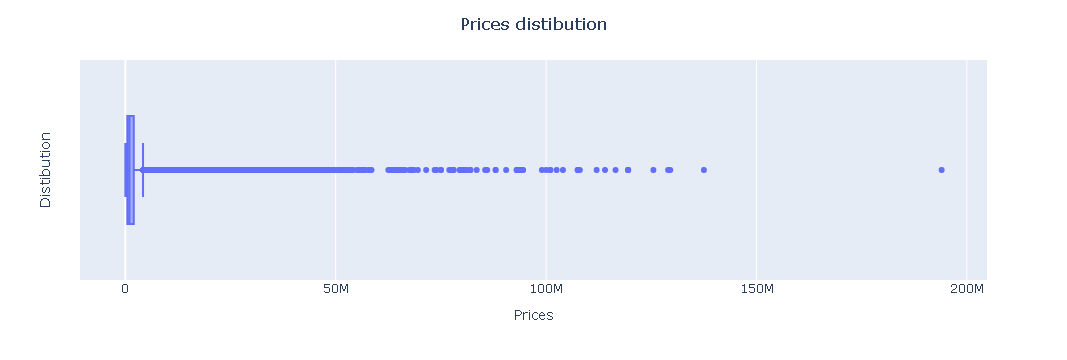

In [106]:
fig = px.box(values, x="value_eur")
fig.update_layout(
    title = 'Prices distibution',
    title_x = 0.5,
    xaxis_title = "Prices",
    yaxis_title = "Distibution")
fig.show()

In [29]:
total_stats.shape

(19239, 31)

In [31]:
total_stats.isna().sum().sum()

0

In [41]:
total_stats.describe().round(0)

,id,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
count,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0,19239.0
mean,231468.0,50.0,46.0,52.0,59.0,42.0,56.0,47.0,42.0,53.0,58.0,65.0,65.0,64.0,61.0,64.0,58.0,65.0,63.0,65.0,47.0,56.0,47.0,50.0,54.0,48.0,58.0,47.0,48.0,46.0
std,27040.0,18.0,20.0,17.0,14.0,18.0,19.0,18.0,17.0,15.0,17.0,15.0,15.0,15.0,9.0,14.0,13.0,12.0,16.0,13.0,19.0,17.0,21.0,20.0,14.0,16.0,12.0,20.0,21.0,21.0
min,41.0,6.0,2.0,5.0,7.0,3.0,4.0,6.0,4.0,9.0,8.0,14.0,15.0,18.0,25.0,15.0,20.0,22.0,12.0,19.0,4.0,10.0,3.0,2.0,10.0,7.0,12.0,4.0,5.0,5.0
25%,214414.0,38.0,30.0,44.0,54.0,30.0,50.0,35.0,31.0,44.0,55.0,57.0,58.0,55.0,56.0,56.0,48.0,57.0,56.0,57.0,32.0,44.0,26.0,40.0,45.0,38.0,50.0,29.0,28.0,25.0
50%,236543.0,54.0,50.0,55.0,62.0,43.0,61.0,49.0,41.0,56.0,63.0,67.0,68.0,66.0,62.0,66.0,59.0,65.0,66.0,66.0,51.0,58.0,53.0,56.0,55.0,49.0,59.0,52.0,56.0,53.0
75%,253532.0,63.0,62.0,64.0,68.0,56.0,68.0,61.0,55.0,64.0,69.0,75.0,75.0,74.0,67.0,74.0,68.0,73.0,74.0,74.0,62.0,68.0,64.0,64.0,64.0,60.0,66.0,63.0,65.0,63.0
max,264640.0,94.0,95.0,93.0,94.0,90.0,96.0,94.0,94.0,93.0,96.0,97.0,97.0,96.0,94.0,96.0,95.0,95.0,97.0,97.0,94.0,95.0,91.0,96.0,95.0,93.0,96.0,93.0,93.0,92.0


### 🔵 4.2 Wage analysis

### 🔵 4.3 Age analysis

### 🔵 4.4 Overall analysis

### 🔵 4.1 Prices analysis

### 🔵 4.1 Prices analysis

### 🔵 4.1 Prices analysis

## 🔵 5. Feature engineering

## 🔵 6. Features encoding

## 🔵 7. Data preprocessing

## 🔵 8. Data Normalization

## 🔵 9. Training / Testing data

## 🔵 10. Model selection and evaluation

In [ ]:
# df.to_sql('data', con=conn, if_exists='replace',index=False)
# conn = psycopg2.connect(conn_string)
# conn.autocommit = True

### 🔵🔵 Prices Analysis